# Question 4

### Loading the Libraries and Data

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

X=[0,3,5,8,13]         #time
Y=[0,225,383,623,993]  #distance/position in feet
DY=[75,77,80,74,72]    #velocity in feet/sec

### Code for obtaining the coefficients of Hermite Interpolation

In [2]:
def hermite(X:list, Y:list, DY:list):  #Using algorithm 3.3 from the book
    n=len(X)-1
    Q=np.zeros((2*n+2,2*n+2))  #initialize Q and z
    z=[0]*(2*n+2)
    for i in range(0,n+1):
        z[2*i]=X[i]
        z[2*i+1]=X[i]
        Q[2*i,0]=Y[i]
        Q[2*i+1,0]=Y[i]
        Q[2*i+1,1]=DY[i]
        if i!=0:
            Q[2*i,1]=(Q[2*i,0]-Q[2*i-1,0])/(z[2*i]-z[2*i-1])

    for i in range(2,2*n+2):
        for j in range(2,i+1):
            Q[i,j]=(Q[i,j-1]-Q[i-1,j-1])/(z[i]-z[i-j])
    c=Q.diagonal()
    return c   #return the diagonal of Q, i.e Q[i,i]

### Code for evaluating the Hermite Interpolating Polynomial at a given point

In [3]:
def hermite_eval(X,Y,DY,x):  #evaluate H(x) using the coefficients from hermite()
    c=hermite(X,Y,DY)
    n=len(X)-1
    
    H_x=0   #initialize H(x)
    for i in range(0,2*n+2):
        temp_prod=c[i]
        if(i%2==0):
            for j in range(0,i//2):
                temp_prod*=(x-X[j])**2    #multiply (x-x0)^2*(x-x1)^2*...*(x-xn)^2
        else:
            for j in range(0,(i-1)//2):
                temp_prod*=(x-X[j])**2
            temp_prod*=(x-X[(i-1)//2])   #multiply (x-x0)^2*(x-x1)^2*...*(x-xn)
        H_x+=temp_prod

    return H_x   #return the value of H(x)
            

### Plotting

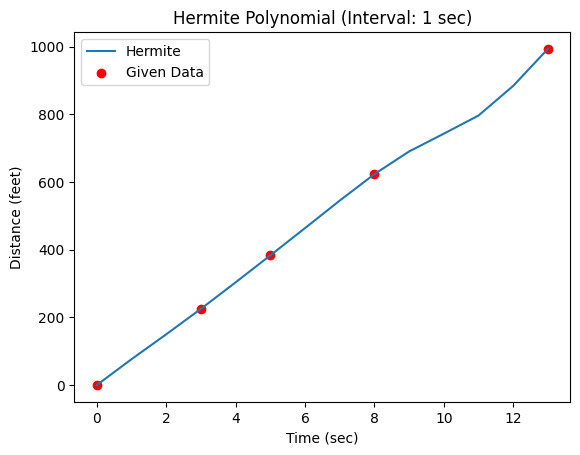

In [4]:
#plot the hermite polynomial

x=np.arange(0,14,1)
plt.plot(x,hermite_eval(X,Y,DY,x),label='Hermite')
plt.scatter(X,Y,label='Given Data',color='red')
plt.legend()
plt.title('Hermite Polynomial (Interval: 1 sec)')
plt.xlabel('Time (sec)')
plt.ylabel('Distance (feet)')
plt.show()


### Expanding the polynomial using sympy

In [5]:
import sympy as sym
x=sym.Symbol('x')
print(sym.expand(hermite_eval(X,Y,DY,x)))
#expand as latex
print('\n Expanding as latex: \n')
print(sym.latex(sym.expand(hermite_eval(X,Y,DY,x))))

-2.02236319728923e-5*x**9 + 0.00104059023036464*x**8 - 0.0218756663126486*x**7 + 0.243041247850604*x**6 - 1.53829559927047*x**5 + 5.5081205113349*x**4 - 10.0953089386411*x**3 + 7.16190803747534*x**2 + 75.0*x

 Expanding as latex: 

- 2.02236319728923 \cdot 10^{-5} x^{9} + 0.00104059023036464 x^{8} - 0.0218756663126486 x^{7} + 0.243041247850604 x^{6} - 1.53829559927047 x^{5} + 5.5081205113349 x^{4} - 10.0953089386411 x^{3} + 7.16190803747534 x^{2} + 75.0 x


### Computationgs regarding the speed of the vehicle

We use the fact that $\frac{dY}{dX}$=Speed, $Y$ being the position, $X$ being the time.

In [6]:
def forward_diff(x,step):
    return (hermite_eval(X,Y,DY,x+step)-hermite_eval(X,Y,DY,x))/step  #forward divided difference approx

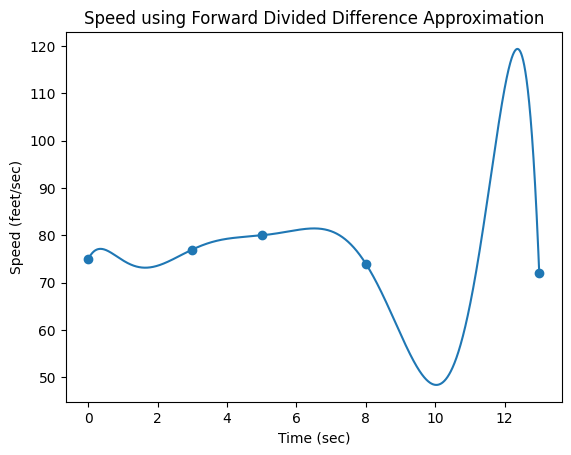

In [7]:
x=np.arange(0,13,10**-4)
y=forward_diff(x,10**-4)

plt.plot(x,y)
plt.scatter(X,DY)
interpolate_data=hermite_eval(X,Y,DY,x)
plt.title('Speed using Forward Divided Difference Approximation')
plt.xlabel('Time (sec)')
plt.ylabel('Speed (feet/sec)')
plt.show()




### Finding out the first exceed of 55mph

The driver first exceeded 55mph at x= 5.6488 sec


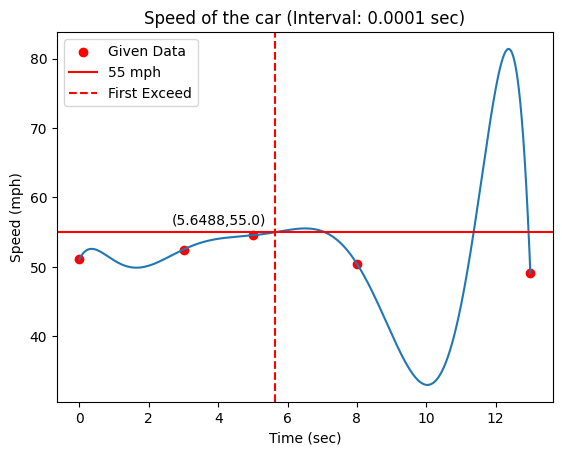

In [8]:
x_line=np.arange(0,13+10**(-4),10**(-4))   #x values for the line
y_line_position=hermite_eval(X,Y,DY,x_line)     #approximate position

y_line_speed=forward_diff(x_line,10**-4)   #approximate speed



y_speed_miles=[i*3600/5280 for i in y_line_speed] #convert to miles per hour



for i in range(len(y_speed_miles)):   #find the first exceed of 55 mph
    if y_speed_miles[i]>55:
        print("The driver first exceeded 55mph at x=",round(x_line[i],5),"sec")
        break  #stop the loop when the first exceed is found


plt.plot(x_line,y_speed_miles)
plt.xlabel('Time (sec)')
plt.ylabel('Speed (mph)')
plt.title('Speed of the car (Interval: 0.0001 sec)')

#convert DY to miles per hour

DY_miles=[i*3600/5280 for i in DY]   #convert to miles per hour for plot

plt.scatter(X,DY_miles,color='red',label='Given Data')

plt.axhline(y=55,color='red',label='55 mph')
plt.axvline(x=x_line[i],color='red',label='First Exceed',linestyle='--')

#write the coordinates of the first exceed in the graph
plt.text(x_line[i]-3,56,'('+str(round(x_line[i],4))+','+str(round(y_speed_miles[i],2))+')')

plt.legend()
plt.show()



### Finding out the maximum speed

In [9]:
upperLim=0    #finding the maximum speed
for i in range((len(y_line_speed))):
    if y_line_speed[i]>upperLim:
        upperLim=y_line_speed[i]
        at_time=x_line[i]

print("The maximum speed is",round(upperLim,4),"fts at time",round(at_time,4),"sec")
print("In mph: ", round(upperLim*3600/5280,4),"mph")

The maximum speed is 119.4173 fts at time 12.3718 sec
In mph:  81.4209 mph
